In [ ]:
!mkdir -p ./kaggle

In [ ]:
!cp kaggle.json ~./kaggle/

cp: cannot create regular file '~./kaggle/': No such file or directory


In [ ]:
!kaggle dataset download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets list | head


ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           7725        290  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           6339        171  1.0              
jockeroika/life-style-data                                    Life Style Data                                       3995645  2025-10-14 13:50:45.303000           9415        213  0.8235294        
ahmadrazakashif

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/salader/dogs-vs-cats


In [ ]:
!cat ~/.kaggle/kaggle.json


{"username":"ujjwalrastogi0","key":"6d8396312f32968e152622a0840a1ff5"}

In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 98% 797M/817M [00:03<00:00, 215MB/s]
100% 817M/817M [00:06<00:00, 130MB/s]


In [ ]:
!unzip -q dogs-vs-cats.zip -d dogs_vs_cats

In [ ]:
import os
print(os.listdir('dogs_vs_cats'))

['test', 'train']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow import keras
from keras import layers,models
import numpy as np
import pandas as pd
from keras.utils import plot_model
from keras.preprocessing.image import load_img
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array

In [ ]:
train_path="/content/dogs_vs_cats/train"
len(os.listdir(train_path+"/train"))

25000

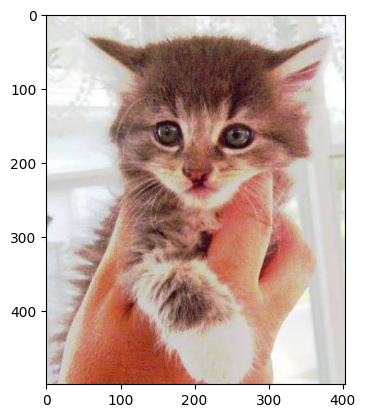

In [ ]:
import cv2
img1=cv2.imread("/content/dogs_vs_cats/train/train/cat.100.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)


# direct print

array([[[224, 225, 220],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [245, 242, 249],
        [245, 242, 249],
        [245, 242, 249]],

       [[222, 223, 218],
        [222, 223, 218],
        [223, 224, 219],
        ...,
        [246, 245, 251],
        [247, 244, 251],
        [247, 244, 251]],

       [[220, 221, 216],
        [221, 222, 217],
        [221, 222, 217],
        ...,
        [247, 246, 252],
        [248, 247, 253],
        [248, 247, 253]],

       ...,

       [[214, 214, 224],
        [214, 217, 224],
        [211, 214, 219],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 218, 224],
        [210, 215, 221],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 218, 224],
        [210, 215, 221],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]]], dtype=uint8)
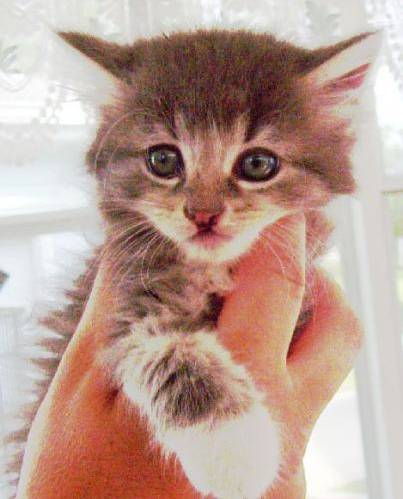

In [ ]:
img1

reading img using PIL

In [ ]:
from PIL import Image

# Path to your image
img_path = '/content/dogs_vs_cats/train/train/cat.0.jpg'  # example

# Open image
img = Image.open(img_path)

# Display image
img.show()
print("Format:", img.format)
print("Size:", img.size)   # (width, height)
print("Mode:", img.mode)   # e.g. "RGB"



Format: JPEG
Size: (500, 374)
Mode: RGB


In [ ]:
import os, shutil
from tqdm import tqdm

base_dir = '/content/dogs_vs_cats/train/train'  # your current folder

# New target folders
new_base = '/content/dogs_vs_cats/train_split'
os.makedirs(os.path.join(new_base, 'cat'), exist_ok=True)
os.makedirs(os.path.join(new_base, 'dog'), exist_ok=True)

# Move each image into its correct folder
for fname in tqdm(os.listdir(base_dir)):
    if 'cat' in fname:
        shutil.copy(os.path.join(base_dir, fname), os.path.join(new_base, 'cat', fname))
    elif 'dog' in fname:
        shutil.copy(os.path.join(base_dir, fname), os.path.join(new_base, 'dog', fname))


100%|██████████| 25000/25000 [00:02<00:00, 8830.01it/s]


In [ ]:
len(os.listdir("/content/dogs_vs_cats/train_split/cat")),len(os.listdir("/content/dogs_vs_cats/train_split/dog"))

(12500, 12500)

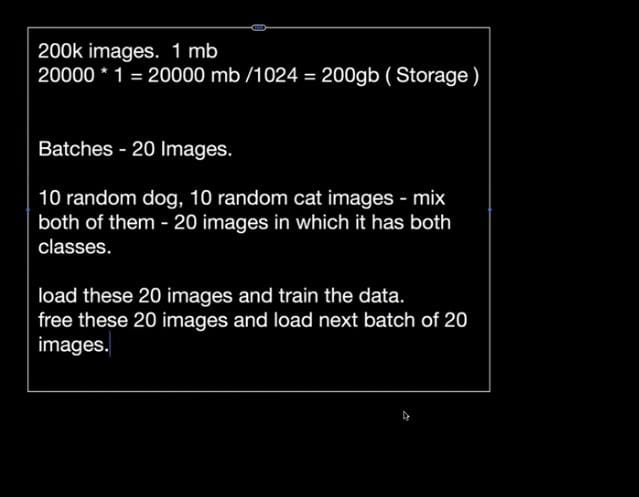

# so due this memory constrain we need to do this and for that we have splited the dogs and cat img in separate folders

In [ ]:
base_dir="/content/dogs_vs_cats/train_split"
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(base_dir,target_size=(150,150),batch_size=20,class_mode='binary',subset='training')
validation_generator=train_datagen.flow_from_directory(base_dir,target_size=(150,150),batch_size=20,class_mode='binary',subset='validation',shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

# Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(150, 150, 3)))

# Convolutional + Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten + Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

### here None is the batch size that we have ,to keep track of how many imgs are processed in that layer

# 1. First conv2D layer

-> input shape=(150,150,3)

->Filter size=(3,3,3)

we have 32 such kernel in 1st

(3x3x3 + 1(bias)) X 32=896 para in 1st layer

output=(148,148,32)

#max pooling layer
input =(148,148,32)

output=(74,74,32)

# conv layer 2
input=(74,74,32)

kernel=(3x3x32) ,64 kernels

output=(72,72,64)

total para=(3x3x32+1) X 64=18,496

#max pooling layer
input =(72,72,64)

output=(36,36,64)

# conv 3 layer

input=(36,36,64)

kernel=(3x3x64) ,128 kernels

output=(34,34,128)

para=(3x3x64+1) X 128 = 73856

#max pooling layer
input =(34,34,128)

output=(17,17,128)

## flatten

input=flatten img (17x17x128)=36992 vector

output=(512)

total para=36992 X 512 +512=18940416

## output layer

input=(512)

output=(1) prediction

toal para=512 X 1 +1

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 49s 44ms/step - accuracy: 0.6211 - loss: 0.6544 - val_accuracy: 0.7504 - val_loss: 0.5111
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7749 - loss: 0.4735 - val_accuracy: 0.7958 - val_loss: 0.4455
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8354 - loss: 0.3716 - val_accuracy: 0.8030 - val_loss: 0.4255
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8811 - loss: 0.2766 - val_accuracy: 0.8156 - val_loss: 0.4310
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9432 - loss: 0.1495 - val_accuracy: 0.8156 - val_loss: 0.5162
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9785 - loss: 0.0639 - val_accuracy: 0.8024 - val_loss: 0.7820
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.8118 - val_loss: 0.9385
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9894 - loss: 0.03

In [ ]:
print("Total training samples:", train_generator.samples)
print("Total validation samples:", validation_generator.samples)
print("Steps per epoch:", train_generator.samples // train_generator.batch_size)


Total training samples: 20000
Total validation samples: 5000
Steps per epoch: 1000


##👇

🧠 Why it shows “1000/1000”

That 1000 represents the number of batches per epoch — i.e.
👉 how many mini-batches (steps) the model processes before completing one epoch.

🔢 Formula behind it
steps per epoch
=
total training images
batch size
steps per epoch=
batch size
total training images
	​

🧮 Let’s calculate yours

You said:

Total images = 25,000 (12,500 cats + 12,500 dogs)

You used a validation_split=0.2 (in ImageDataGenerator)
→ So training data = 80% of 25,000 = 20,000 images

Batch size = 20

steps per epoch
=
20
,
000
/
20
=
1000
steps per epoch=20,000/20=1000

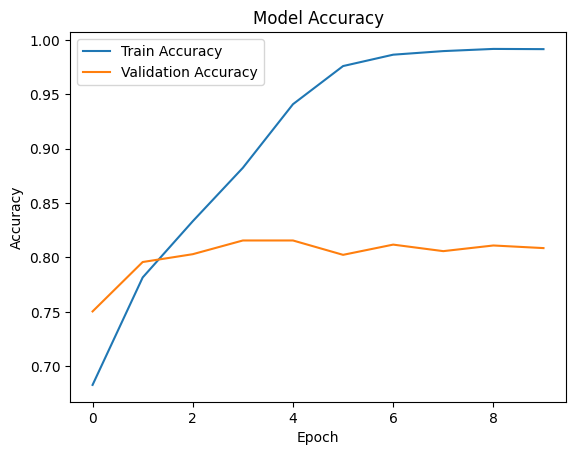

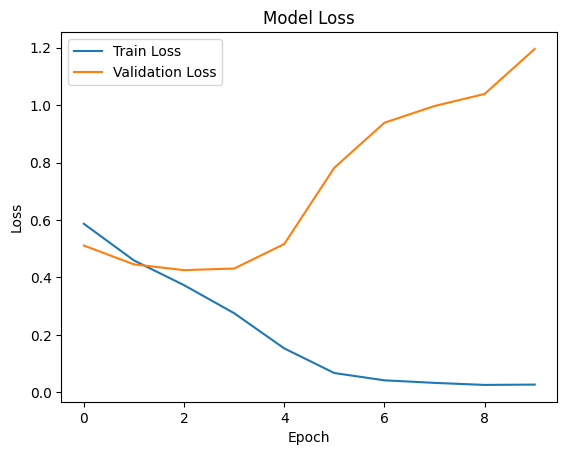

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---- Plot Loss ----
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_dir="/content/dogs_vs_cats/test"
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary',shuffle=False)


Found 12500 images belonging to 1 classes.


In [ ]:
# test_loss,test_acc=model.evaluate(test_generator,steps=len(test_generator))
# print(test_acc,test_loss)

# cant do this as we dont have true labels

In [ ]:
prob=model.predict(test_generator)
prob

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step


array([[9.9995029e-01],
       [3.0785774e-08],
       [3.6926863e-08],
       ...,
       [9.9999082e-01],
       [3.6496211e-17],
       [1.4517769e-02]], dtype=float32)

In [ ]:
pred_class_label=[prob>0.5]

In [ ]:
pred_class_label=(prob>0.5).astype(int)

In [ ]:
pred_class_label

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
test_generator.class_indices,test_generator.classes

({'test': 0}, array([0, 0, 0, ..., 0, 0, 0], dtype=int32))

In [ ]:
# here 1 is dog ,0 is cat

In [ ]:
test_img1=cv2.imread("/content/dogs_vs_cats/test/test/100.jpg")
# test_img1=cv2.resize(test_img1,(150,150))
# test_img1=np.expand_dims(test_img1,axis=0)
# test_img1=test_img1/255

array([[[  5,   5,   5],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  5,   5,   5],
        [ 19,  19,  19],
        [ 18,  18,  18]],

       [[  5,   5,   5],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  8,   8,   8],
        [ 21,  21,  21],
        [ 20,  20,  20]],

       [[  5,   5,   5],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  9,   9,   9],
        [ 22,  22,  22],
        [ 20,  20,  20]],

       ...,

       [[206, 196, 156],
        [203, 193, 153],
        [199, 190, 152],
        ...,
        [255, 254, 253],
        [254, 254, 254],
        [253, 253, 253]],

       [[205, 195, 155],
        [203, 193, 153],
        [199, 190, 152],
        ...,
        [255, 253, 252],
        [253, 253, 253],
        [253, 253, 253]],

       [[202, 192, 152],
        [200, 190, 150],
        [199, 190, 152],
        ...,
        [254, 252, 251],
        [252, 252, 252],
        [252, 252, 252]]], dtype=uint8)
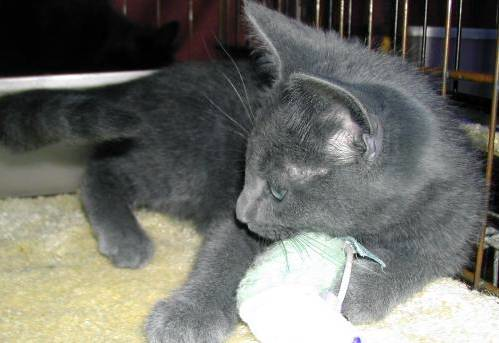

In [ ]:
test_img1

*if want to predict only one then*

In [ ]:
test_img=cv2.imread("/content/dogs_vs_cats/test/test/10001.jpg")
print(test_img.shape)
test_img=cv2.resize(test_img,(150,150))
test_img=np.expand_dims(test_img,axis=0) # so model will understand that ek batch me idhar ek he img h
print(test_img.shape)
test_img=test_img/255

(293, 499, 3)
(1, 150, 150, 3)


In [ ]:
model.predict(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.02384781]], dtype=float32)

In [ ]:
# class->0 ,so cat

array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [236, 223, 207],
        [236, 223, 207],
        [236, 223, 207]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [236, 223, 207],
        [236, 223, 207],
        [236, 223, 207]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [236, 223, 207],
        [236, 223, 207],
        [236, 223, 207]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
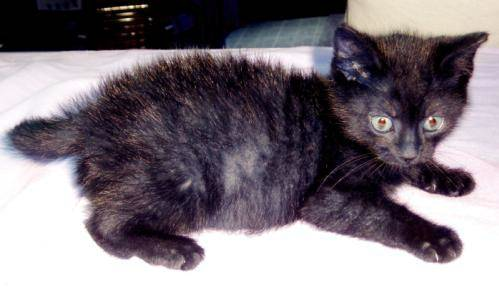

In [ ]:
cv2.imread("/content/dogs_vs_cats/test/test/10001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Pridiction [[0.9975042]]


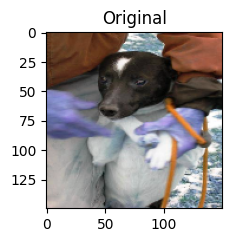

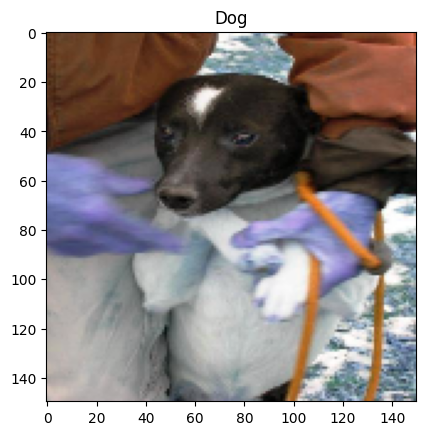

In [ ]:
def make_prediction(img_path):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(150,150))
  img_array=np.expand_dims(img,axis=0)
  img_array=img_array/255
  pred=model.predict(img_array)
  print(f"Pridiction {pred}")


  # og img
  plt.figure(figsize=(5,5))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title("Original")
  plt.show()

  # pred
  if pred[0][0]>0.5:   #pred[0][0] as we have pred in array([[0.02384781]], dtype=float32)
    plt.title("Dog")
  else:
    plt.title("Cat")
  plt.imshow(img)
  plt.show()


make_prediction("/content/dogs_vs_cats/test/test/1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/tmp/ipython-input-2979128346.py:34: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


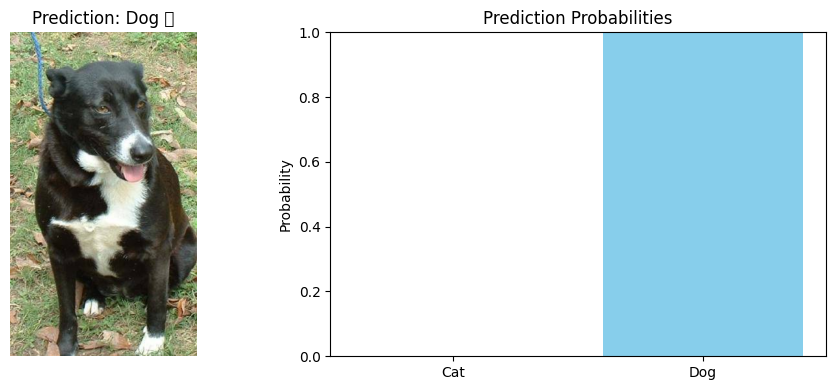

🐱 Cat Probability: 0.002
🐶 Dog Probability: 0.998


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def make_prediction(img_path):
    # Read and preprocess image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR→RGB for correct colors
    img_resized = cv2.resize(img, (150,150))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)[0][0]

    # Probabilities
    prob_cat = 1 - pred
    prob_dog = pred

    # Show original image
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {'Dog 🐶' if pred > 0.5 else 'Cat 🐱'}")

    # Bar chart for probabilities
    plt.subplot(1,2,2)
    plt.bar(['Cat', 'Dog'], [prob_cat, prob_dog], color=['orange', 'skyblue'])
    plt.ylim([0,1])
    plt.ylabel("Probability")
    plt.title("Prediction Probabilities")

    plt.tight_layout()
    plt.show()

    print(f"🐱 Cat Probability: {prob_cat:.3f}")
    print(f"🐶 Dog Probability: {prob_dog:.3f}")

# Example
make_prediction("/content/dogs_vs_cats/test/test/1000.jpg")
